In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

Loading all Parquet 

In [9]:
advanced_playoffs = pd.read_parquet('D:\\Programming\\Projects\\projects using Python\\NBA\\NBA History Analysis\\Data\\advanced_playoffs.parq')
average_playoffs = pd.read_parquet('D:\\Programming\\Projects\\projects using Python\\NBA\\NBA History Analysis\\Data\\average_playoffs.parq')
total_playoffs = pd.read_parquet('D:\\Programming\\Projects\\projects using Python\\NBA\\NBA History Analysis\\Data\\total_playoffs.parq')
advanced = pd.read_parquet('D:\\Programming\\Projects\\projects using Python\\NBA\\NBA History Analysis\\Data\\advanced.parq')
average = pd.read_parquet('D:\\Programming\\Projects\\projects using Python\\NBA\\NBA History Analysis\\Data\\average.parq')
roster = pd.read_parquet('D:\\Programming\\Projects\\projects using Python\\NBA\\NBA History Analysis\\Data\\roster.parq')
total= pd.read_parquet('D:\\Programming\\Projects\\projects using Python\\NBA\\NBA History Analysis\\Data\\total.parq')

In [23]:
advanced_playoffs.head()

,Rk,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,WS,WS/48,Unnamed: 22,OBPM,DBPM,BPM,VORP,team,season,team_retcon
0,1,Kevin Garnett,20,3,125,19.3,0.497,0.020,0.059,11.4,...,0.1,0.047,NaN,2.5,-1.4,1.2,0.1,MIN,1997/1998,MIN
1,2,Tom Gugliotta,27,3,121,15.7,0.488,0.077,0.192,1.7,...,0.0,-0.006,NaN,-0.2,0.3,0.0,0.1,MIN,1997/1998,MIN
2,3,Dean Garrett,30,3,118,18.8,0.569,0.000,0.345,16.3,...,0.3,0.116,NaN,1.4,-2.7,-1.3,0.0,MIN,1997/1998,MIN
3,4,Stephon Marbury,19,3,117,15.2,0.461,0.308,0.154,1.7,...,-0.2,-0.066,NaN,1.1,-4.0,-2.9,0.0,MIN,1997/1998,MIN
4,5,Doug West,29,3,87,14.5,0.636,0.091,0.409,0.0,...,0.1,0.080,NaN,-1.7,0.4,-1.3,0.0,MIN,1997/1998,MIN


In [24]:
average.head()

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,team,season,team_retcon
0,1,Isaiah Rider,23,75,67,35.3,7.4,16.7,0.447,1.9,...,3.3,3.3,0.9,0.3,3.1,2.6,20.4,MIN,1995/1996,MIN
1,2,Christian Laettner,25,81,80,34.2,5.6,11.4,0.489,0.2,...,7.6,2.9,1.2,1.1,2.8,3.7,16.3,MIN,1995/1996,MIN
2,3,Doug West,27,71,65,32.8,4.9,10.7,0.461,0.2,...,3.2,2.6,0.9,0.3,1.8,3.5,12.9,MIN,1995/1996,MIN
3,4,Tom Gugliotta,25,31,17,32.8,5.2,11.5,0.454,0.9,...,7.2,4.5,2.0,0.9,2.6,2.8,14.4,MIN,1995/1996,MIN
4,5,Sean Rooks,25,80,70,30.1,3.6,7.7,0.470,0.0,...,6.1,1.2,0.4,0.9,1.8,2.6,10.9,MIN,1995/1996,MIN


In [29]:
total.head()

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,team,season,team_retcon,Season
0,1.0,Christian Laettner,25.0,81,80.0,2770,450,920,0.489,13,...,234,101,87,225,302,1322,MIN,1995/1996,MIN,1995-20
1,2.0,Isaiah Rider,23.0,75,67.0,2645,558,1249,0.447,139,...,245,69,23,232,194,1532,MIN,1995/1996,MIN,1995-20
2,3.0,Sean Rooks,25.0,80,70.0,2405,289,615,0.470,0,...,97,29,71,142,208,868,MIN,1995/1996,MIN,1995-20
3,4.0,Doug West,27.0,71,65.0,2328,351,762,0.461,11,...,185,65,24,126,250,919,MIN,1995/1996,MIN,1995-20
4,5.0,Winston Garland,30.0,73,58.0,1931,170,410,0.415,19,...,318,71,13,105,184,448,MIN,1995/1996,MIN,1995-20


# Player Performance Analysis

In [30]:
#extracting the 'season' information from the 'seasons' column
total['Season'] = total['season'].str.extract(r'(\d{4})')[0] + '-' + (total['season'].str.extract(r'(\d{2})')[0].astype(int) + 1).astype(str)


->Analyzing Points Per Game (PPG) for a specific player-  PPG calculation-> total points scored  / total number of games played

-We create a list of players to analyze 

-You can replace the players in the list with the ones you want to analyze, these 5 are my favorites:)  

In [61]:
players_to_analyze = ['Michael Jordan', 'LeBron James','Stephen Curry','Giannis Antetokounmpo','Kevin Durant']

Creatings plots for each player 

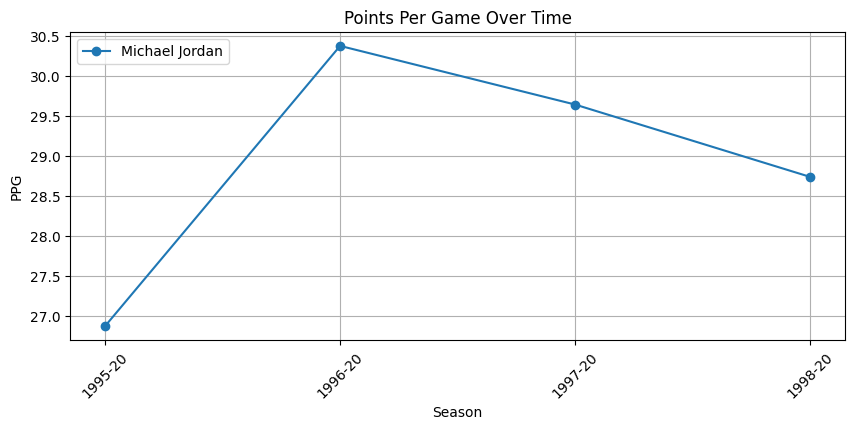

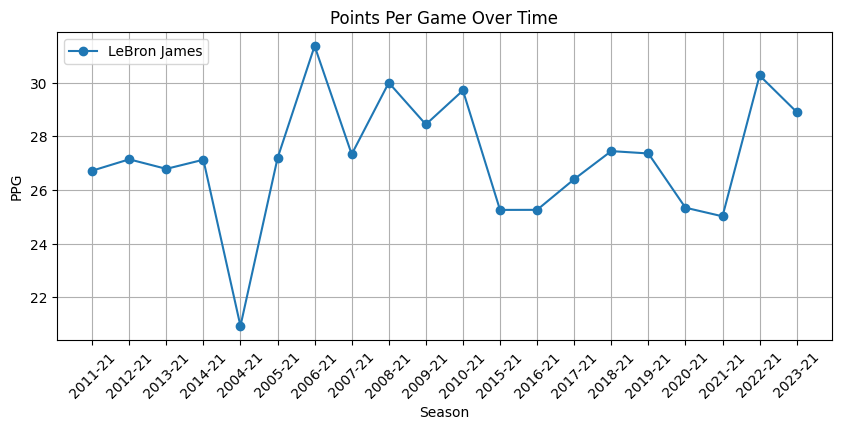

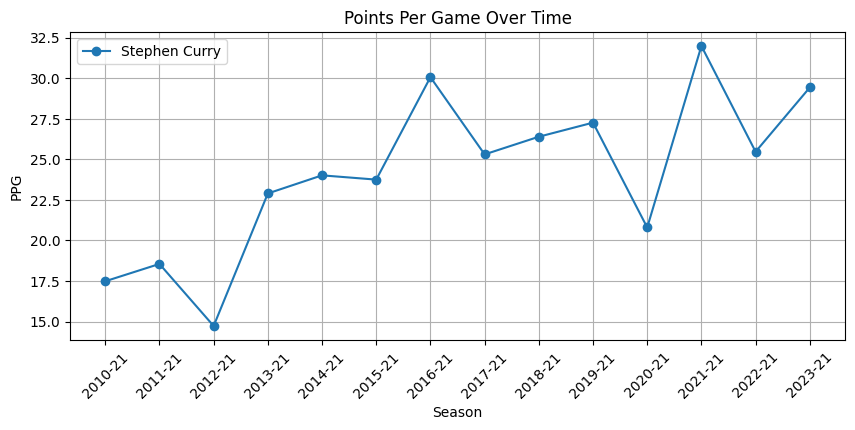

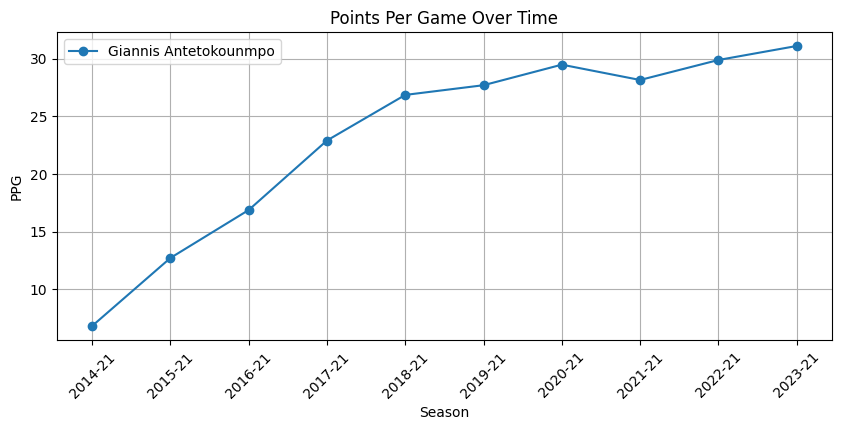

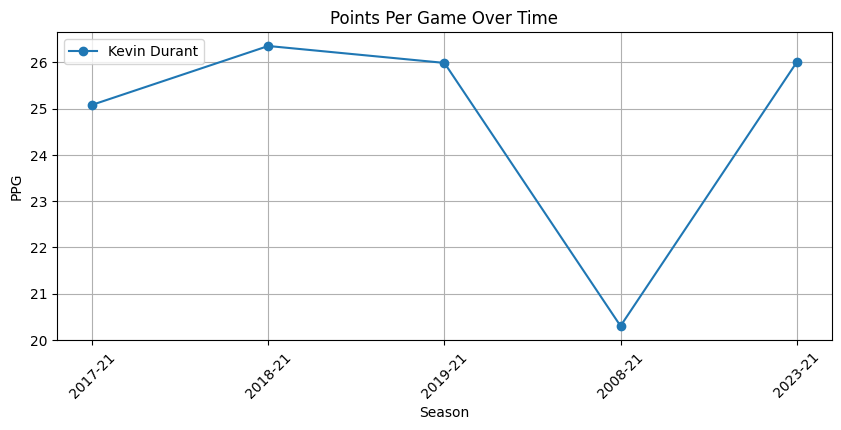

In [63]:
for player_name in players_to_analyze:
    player_data = total[total['Player'] == player_name].copy()
    player_data['PPG'] = player_data['PTS'] / player_data['G']    

    plt.figure(figsize=(10,4))
    plt.plot(player_data['Season'], player_data['PPG'], marker = 'o', linestyle = '-', label = player_name)
    plt.title('Points Per Game Over Time')
    plt.xlabel('Season')
    plt.ylabel('PPG')
    plt.xticks(rotation= 45)
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.show()

# Top Performance in Playoffs 

In [70]:
total_playoffs['Season'] = total_playoffs['season'].str.extract(r'(\d{4})')[0] + '-' + (total_playoffs['season'].str.extract(r'(\d{2})')[0].astype(int) + 1).astype(str)

In [72]:
total_playoffs.head() #added a Season column with '-'

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,team,season,team_retcon,Season
0,1,Kevin Garnett,20,3,3,125,24,51,0.471,1,...,11,4,3,4,6,52,MIN,1997/1998,MIN,1997-20
1,2,Tom Gugliotta,27,3,3,121,23,52,0.442,3,...,13,7,2,6,13,55,MIN,1997/1998,MIN,1997-20
2,3,Dean Garrett,30,3,3,118,15,29,0.517,0,...,4,2,3,1,11,38,MIN,1997/1998,MIN,1997-20
3,4,Stephon Marbury,19,3,3,117,26,65,0.400,6,...,23,2,0,9,9,64,MIN,1997/1998,MIN,1997-20
4,5,Doug West,29,3,3,87,12,22,0.545,0,...,6,2,1,1,11,33,MIN,1997/1998,MIN,1997-20


Creating merged data from total_playoffs & average_playoffs to include player statistics and then adding suffixes 

In [73]:
merged_data = total_playoffs.merge(average_playoffs[['Player', 'PTS', 'TRB', 'AST']], on='Player', suffixes=('_total', '_average'))


In [74]:
merged_data.head()

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,TOV,PF,PTS_total,team,season,team_retcon,Season,PTS_average,TRB_average,AST_average
0,1,Kevin Garnett,20,3,3,125,24,51,0.471,1,...,4,6,52,MIN,1997/1998,MIN,1997-20,17.3,9.3,3.7
1,1,Kevin Garnett,20,3,3,125,24,51,0.471,1,...,4,6,52,MIN,1997/1998,MIN,1997-20,15.8,9.6,4.0
2,1,Kevin Garnett,20,3,3,125,24,51,0.471,1,...,4,6,52,MIN,1997/1998,MIN,1997-20,21.8,12.0,3.8
3,1,Kevin Garnett,20,3,3,125,24,51,0.471,1,...,4,6,52,MIN,1997/1998,MIN,1997-20,18.8,10.8,8.8
4,1,Kevin Garnett,20,3,3,125,24,51,0.471,1,...,4,6,52,MIN,1997/1998,MIN,1997-20,21.0,12.0,4.3


Grouping data by 'Player' and 'Season' to calculate total points, rebound and assists during playoffs 

In [75]:
player_playoff_stats = merged_data.groupby(['Player', 'Season'])[['PTS_average','TRB_average', 'AST_average']].sum().reset_index()

Visualizing the Top 5 Performers in terms of points during playoff seasons  

In [77]:
top_players_by_points = player_playoff_stats.groupby('Season')[['Player', 'PTS_average']].apply(lambda x: x.nlargest(5, 'PTS_average')).reset_index()

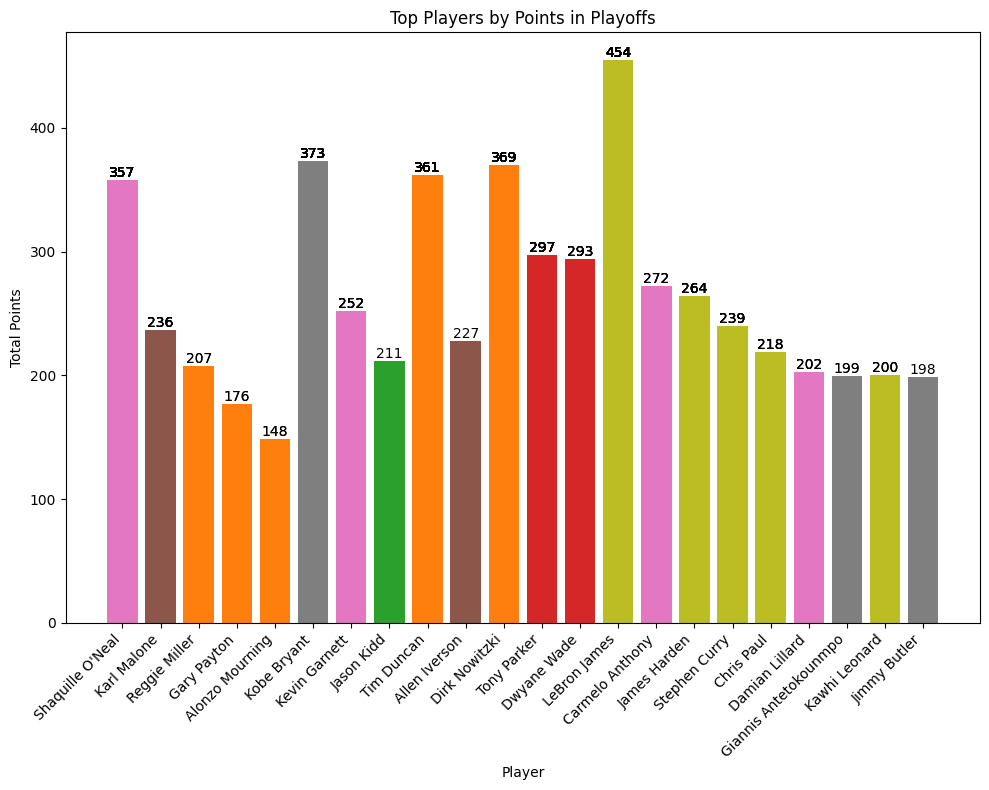

In [81]:
top_players_by_points= top_players_by_points.sort_values(by='PTS_average', ascending=False)
plt.figure(figsize=(10,8))
for season,group in top_players_by_points.groupby('Season'):
    bars=plt.bar(group['Player'], group['PTS_average'], label= season)

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(), str(int(bar.get_height())), ha='center', va= 'bottom')
plt.title('Top Players by Points in Playoffs')
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.xticks(rotation= 45, ha= 'right')
plt.tight_layout()
plt.show()        

Calculating Top Performers in terms of rebounds and assists separately

In [82]:
player_playoff_stats = merged_data.groupby(['Player', 'Season'])[['TRB_average','AST_average']].sum().reset_index()


In [83]:
top_players_by_rebounds = player_playoff_stats.groupby('Season')[['Player', 'TRB_average']].apply(lambda x: x.nlargest(5, 'TRB_average')).reset_index()
top_players_by_assists = player_playoff_stats.groupby('Season')[['Player', 'AST_average']].apply(lambda x: x.nlargest(5, 'AST_average')).reset_index()

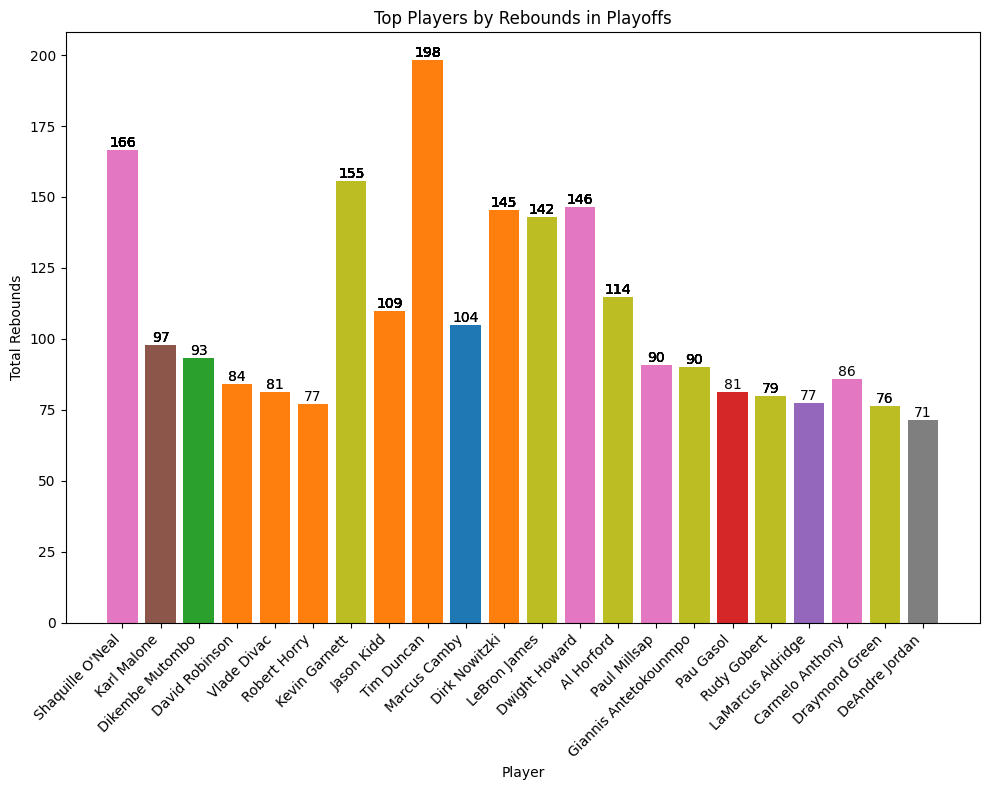

In [85]:
plt.figure(figsize=(10,8))
for season,group in top_players_by_rebounds.groupby('Season'):
    bars=plt.bar(group['Player'], group['TRB_average'], label= season)

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(), str(int(bar.get_height())), ha='center', va= 'bottom')
plt.title('Top Players by Rebounds in Playoffs')
plt.xlabel('Player')
plt.ylabel('Total Rebounds')
plt.xticks(rotation= 45, ha= 'right')
plt.tight_layout()
plt.show()        

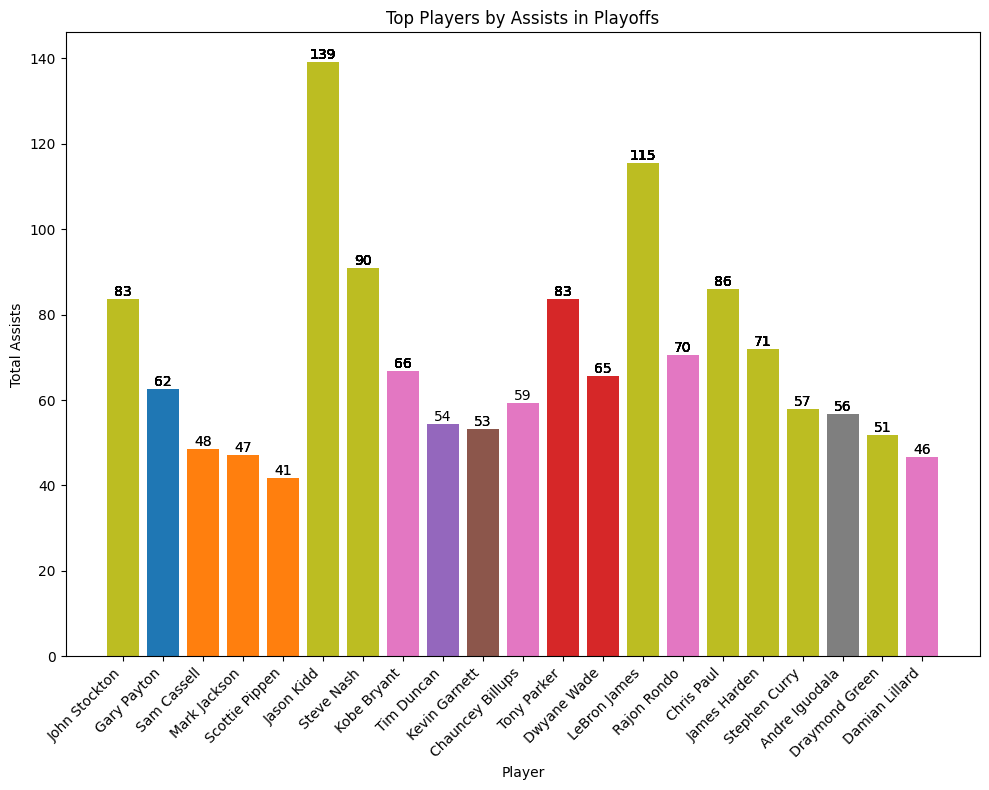

In [87]:
plt.figure(figsize=(10,8))
for season,group in top_players_by_assists.groupby('Season'):
    bars=plt.bar(group['Player'], group['AST_average'], label= season)

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(), str(int(bar.get_height())), ha='center', va= 'bottom')
plt.title('Top Players by Assists in Playoffs')
plt.xlabel('Player')
plt.ylabel('Total Assists')
plt.xticks(rotation= 45, ha= 'right')
plt.tight_layout()
plt.show()        